In [ ]:
import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# ***Load Data***

In [ ]:
!gdown --id "1bR9qqVYcYKDtamo4Zs2_Dips-LM6c0pP" --output "label.txt"
!gdown --id "1axrwfW1grtURgyeKE-nWzebx3co66C4d" --output "index.txt"
!gdown --id "1xuBK4VTU7Is1FZw_iM21mCsXGC_OaAV6" --output "gene.txt"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bR9qqVYcYKDtamo4Zs2_Dips-LM6c0pP
To: /content/label.txt
100% 208/208 [00:00<00:00, 151kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1axrwfW1grtURgyeKE-nWzebx3co66C4d
To: /content/index.txt
100% 542k/542k [00:00<00:00, 107MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.g

In [ ]:
indexes = pd.read_csv('index.txt', delimiter = '\t', header = None)
x = pd.read_csv('gene.txt', delimiter = ' ', header = None).to_numpy().T
y = pd.read_csv('label.txt', header = None).to_numpy()
y = (y>0).astype(int).reshape(y.shape[0])
x
#y.shape

NameError: ignored

# ***Feature ranking***

In [ ]:
# TODO: Design your score function for feature selection
# TODO: To use the provided evaluation sample code, you need to generate ranking_idx, which is the sorted index of feature
from sklearn import feature_selection as fs
X_new=fs.SelectKBest(fs.chi2,k=5)#.fit_transform(x,y)#SelectKBest: 選取排名前K個重要特徵 Chi-squared stats of non-negative features for classification tasks
#X_new=fs.SelectPercentile(fs.mutual_info_classif,percentile=50)#.fit_transform(x,y)#SelectPercentile: 選取排名前K%的重要特徵

fit=X_new.fit(x,y)
a=fit.scores_
#fit_sort=np.sort(a)
fit_sort=abs(np.sort(-a))
#print(fit_sort)
b=np.argsort(fit_sort)
ranking_idx=b
ranking_idx[:1]

array([1999])

# ***Feature evaluation***

In [ ]:
# Use a simple dicision tree with 5-fold validation to evaluate the feature selection result.
# You can try other classifier and hyperparameter.
score_history = []
for m in range(5, 2001, 5):
    # Select Top m feature
    x_subset = x[:, ranking_idx[:m]]

    # Build random forest
    clf = DecisionTreeClassifier(random_state=0)
    #clf = SVC(kernel='rbf', random_state=0) #build SVM

    # Calculate validation score
    scores = cross_val_score(clf, x_subset, y, cv=5)

    # Save the score calculated with m feature
    score_history.append(scores.mean())

# Report best accuracy.
print(f"Max of Decision Tree: {max(score_history)}")
print(f"Number of features: {np.argmax(score_history)*5+5}")

Max of Decision Tree: 0.8512820512820513
Number of features: 565


In [ ]:
len(score_history)

400

# ***Visualization***

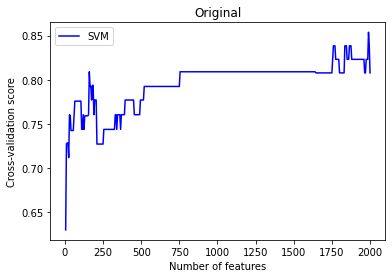

In [ ]:
plt.plot(range(5, 2001, 5), score_history, c='blue')
plt.title('Original')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score')
plt.legend(['SVM'])#
plt.savefig('1-3_result.png')

# ***Genetic Algorithm***

In [ ]:
x=pd.DataFrame(x)

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""# Genetic Algorithm Code"""

import math
import random
import statistics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

def genetic_algo(data,features,target,population_size,tol_level,top_number):



  def init_population(population_size,c,top_number):
    population = []
    for i in range(population_size):
      individual = [0]*c
      j = 0
      while(j<top_number):
        p = random.uniform(0,1)
        position = random.randrange(c)
        if(p>=0.5 and individual[position]==0):
          individual[position]=1
          j=j+1

      #edge case if all genes are 0 then we will make any one gene as 1
      if(sum(individual)==0):
        position = random.randrange(c)
        individual[position] = 1

      population.append(individual)
    print('population is ')
    print(population)
    print('------------------')
    return population




  def calculate_fitness(features,target):
    model = MLPClassifier()
    scores = cross_val_score(model,features,target,scoring='f1_macro',n_jobs=-1,cv=10) #using f1_score as it is an imbalanced dataset
    print(scores.mean())
    return scores.mean()



  def get_fitness(population,data):
    fitness_values = []
    for individual in population:
      df = data
      i=0
      for column in data:
        if(individual[i]==0):
          df = df.drop(column,axis=1)
        i=i+1

      features = df
      individual_fitness = calculate_fitness(features,target)
      fitness_values.append(individual_fitness)

    return fitness_values



  def select_parents(population,fitness_values):
    parents = []
    total = sum(fitness_values)
    norm_fitness_values = [x/total for x in fitness_values]

    #find cumulative fitness values for roulette wheel selection
    cumulative_fitness = []
    start = 0
    for norm_value in norm_fitness_values:
      start+=norm_value
      cumulative_fitness.append(start)

    population_size = len(population)
    for count in range(population_size):
      random_number = random.uniform(0, 1)
      individual_number = 0
      for score in cumulative_fitness:
        if(random_number<=score):
          parents.append(population[individual_number])
          break
        individual_number+=1
    return parents



  #high probability crossover
  def two_point_crossover(parents,probability):
    random.shuffle(parents)
    #count number of pairs for crossover
    no_of_pairs = round(len(parents)*probability/2)
    chromosome_len = len(parents[0])
    crossover_population = []

    for num in range(no_of_pairs):
      length = len(parents)
      parent1_index = random.randrange(length)
      parent2_index = random.randrange(length)
      while(parent1_index == parent2_index):
        parent2_index = random.randrange(length)

      start = random.randrange(chromosome_len)
      end = random.randrange(chromosome_len)
      if(start>end):
        start,end = end, start

      parent1 = parents[parent1_index]
      parent2 = parents[parent2_index]
      child1 =  parent1[0:start]
      child1.extend(parent2[start:end])
      child1.extend(parent1[end:])
      child2 =  parent2[0:start]
      child2.extend(parent1[start:end])
      child2.extend(parent2[end:])
      parents.remove(parent1)
      parents.remove(parent2)
      crossover_population.append(child1)
      crossover_population.append(child2)

    #to append remaining parents which are not undergoing crossover process
    if(len(parents)>0):
      for remaining_parents in parents:
        crossover_population.append(remaining_parents)

    return crossover_population



  #low probability mutation
  #mutation_probability is generally low to avoid a lot of randomness
  def mutation(crossover_population):
    #swapping of zero with one to retain no of features required
    for individual in crossover_population:
      index_1 = random.randrange(len(individual))
      index_2 = random.randrange(len(individual))
      while(index_2==index_1 and individual[index_1] != individual[index_2]):
        index_2 = random.randrange(len(individual))

      #swapping the bits
      temp = individual[index_1]
      individual[index_1] = individual[index_2]
      individual[index_2] = temp

    return crossover_population






  c = data.shape[1] #length of the chromosome
  population= init_population(population_size,c,top_number)
  fitness_values = get_fitness(population,data)
  parents = select_parents(population,fitness_values)
  crossover_population = two_point_crossover(parents,0.78)
  population = crossover_population
  p = random.uniform(0,1)
  if(p<=0.001):
    mutated_population = mutation(crossover_population)
    population = mutated_population
  fitness_values = get_fitness(population,data)
  variance_of_population = statistics.variance(fitness_values)
  print("variance is",variance_of_population)
  gen = 1


  #repeating algorithm til stopping criterion is met
  while(variance_of_population > tol_level):
    print('generation-',gen)
    parents = select_parents(population,fitness_values)
    crossover_population = two_point_crossover(parents,0.78)
    population = crossover_population
    p = random.uniform(0,1)
    if(p<=0.001): #mutation prob here
      mutated_population = mutation(crossover_population)
      population = mutated_population
    fitness_values = get_fitness(population,data)
    variance_of_population = statistics.variance(fitness_values)
    print("variance is",variance_of_population)
    gen+=1

  best_features = []
  best_f1_score = 0
  optimal_fitness = sum(fitness_values)/len(fitness_values)
  print('avg fitness is: ',optimal_fitness)
  for index,fitness_value in enumerate(fitness_values):
    error = abs((fitness_value - optimal_fitness)/optimal_fitness)
    if(error <= 0.01):
      best_features = population[index]
      best_f1_score = fitness_value
  print(best_features)
  return best_features,best_f1_score


#running the algorithm
top_features, best_f1_score = genetic_algo(x,x,y,40,0.005,25)

#printing top features selected through genetic algorithm
i = 0
list_of_features= []
for i in range(len(top_features)):
  if(top_features[i]==1):
    list_of_features.append(x.columns[i])

print(top_features)
print(list_of_features)
print(best_f1_score)

population is 
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,